In [1]:
import sys
import glob
import warnings
warnings.filterwarnings('ignore')

import xarray as xr
import matplotlib.pyplot as plt
from clisops.core.subset import subset_shape
import cartopy.crs as ccrs
import cartopy
import numpy as np
import geopandas as gp

sys.path.append('/g/data/xv83/quantile-mapping/qqscale')
import utils

In [2]:
qq_file = "/g/data/ia39/australian-climate-service/test-data/QDC-CMIP6-v2/BARRA-R2/EC-Earth3/ssp370/r1i1p1f1/day/pr/2070-2099/pr_day_EC-Earth3_ssp370_r1i1p1f1_AUS-11_2070-2099_qdc-multiplicative-monthly-q100-linear_BARRA-R2-baseline-1985-2014_model-baseline-1985-2014.nc"
qq_cap_file = "/g/data/ia39/australian-climate-service/test-data/QDC-CMIP6-v2/BARRA-R2/EC-Earth3/ssp370/r1i1p1f1/day/pr/2070-2099/pr_day_EC-Earth3_ssp370_r1i1p1f1_AUS-11_2070-2099_qdc-multiplicative-monthly-q100-linear-maxaf5_BARRA-R2-baseline-1985-2014_model-baseline-1985-2014.nc"
qq_cap_cmatch_file = "/g/data/ia39/australian-climate-service/test-data/QDC-CMIP6-v2/BARRA-R2/EC-Earth3/ssp370/r1i1p1f1/day/pr/2070-2099/pr_day_EC-Earth3_ssp370_r1i1p1f1_AUS-11_2070-2099_qdc-multiplicative-monthly-q100-linear-maxaf5-annual-change-matched_BARRA-R2-baseline-1985-2014_model-baseline-1985-2014.nc"
hist_files = sorted(glob.glob("/g/data/oi10/replicas/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/day/pr/gr/v20200310/pr_day_EC-Earth3_historical_r1i1p1f1_gr_*0101-*1231.nc"))
ref_files = sorted(glob.glob("/g/data/oi10/replicas/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp370/r1i1p1f1/day/pr/gr/v20200310/pr_day_EC-Earth3_ssp370_r1i1p1f1_gr_2*0101-2*1231.nc"))
target_files = sorted(glob.glob("/g/data/ob53/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/day/pr/v20240809/pr_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1_day_*.nc"))

In [3]:
ds_hist = utils.read_data(
    hist_files,
    'pr',
    time_bounds=['1985', '2014'],
    input_units="kg m-2 s-1",
    output_units="mm day-1",
)
try:
    ds_hist = ds_hist.drop_vars('crs')
except ValueError:
    pass

In [4]:
ds_ref = utils.read_data(
    ref_files,
    'pr',
    time_bounds=['2070', '2099'],
    input_units="kg m-2 s-1",
    output_units="mm day-1",
)
try:
    ds_ref = ds_ref.drop_vars('crs')
except ValueError:
    pass

In [5]:
ds_target = utils.read_data(
    target_files,
    'pr',
    time_bounds=['1985', '2014'],
    input_units="kg m-2 s-1",
    output_units="mm day-1",
)
try:
    ds_target = ds_target.drop_vars('crs')
except ValueError:
    pass

In [6]:
ds_qq = utils.read_data(
    qq_file,
    'pr',
    time_bounds=['2070', '2099'],
)
try:
    ds_qq = ds_qq.drop_vars('crs')
except ValueError:
    pass

In [7]:
ds_qq_cap = utils.read_data(
    qq_cap_file,
    'pr',
    time_bounds=['2070', '2099'],
)
try:
    ds_qq_cap = ds_qq_cap.drop_vars('crs')
except ValueError:
    pass

In [8]:
ds_qq_cap_cmatch = utils.read_data(
    qq_cap_cmatch_file,
    'pr',
    time_bounds=['2070', '2099'],
)
try:
    ds_qq_cap_cmatch = ds_qq_cap_cmatch.drop_vars('crs')
except ValueError:
    pass

In [9]:
shape = gp.read_file('/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/australia/australia.shp')

In [10]:
da_hist_clim = ds_hist['pr'].mean('time')
da_hist_clim = subset_shape(da_hist_clim, shape=shape)
da_hist_clim = da_hist_clim.compute()

In [11]:
da_ref_clim = ds_ref['pr'].mean('time').compute()
da_ref_clim = subset_shape(da_ref_clim, shape=shape)
da_ref_clim = da_ref_clim.compute()

In [12]:
da_target_clim = ds_target['pr'].mean('time').compute()
da_target_clim = subset_shape(da_target_clim, shape=shape)
da_target_clim = da_target_clim.compute()

In [13]:
da_qq_clim = ds_qq['pr'].mean('time').compute()
da_qq_clim = subset_shape(da_qq_clim, shape=shape)
da_qq_clim = da_qq_clim.compute()

In [14]:
da_qq_cap_clim = ds_qq_cap['pr'].mean('time').compute()
da_qq_cap_clim = subset_shape(da_qq_cap_clim, shape=shape)
da_qq_cap_clim = da_qq_cap_clim.compute()

In [15]:
da_qq_cap_cmatch_clim = ds_qq_cap_cmatch['pr'].mean('time').compute()
da_qq_cap_cmatch_clim = subset_shape(da_qq_cap_cmatch_clim, shape=shape)
da_qq_cap_cmatch_clim = da_qq_cap_cmatch_clim.compute()

In [16]:
model_change = ((da_ref_clim - da_hist_clim) / da_hist_clim) * 100
qq_change = ((da_qq_clim - da_target_clim) / da_target_clim) * 100
qq_cap_change = ((da_qq_cap_clim - da_target_clim) / da_target_clim) * 100
qq_cap_cmatch_change = ((da_qq_cap_cmatch_clim - da_target_clim) / da_target_clim) * 100

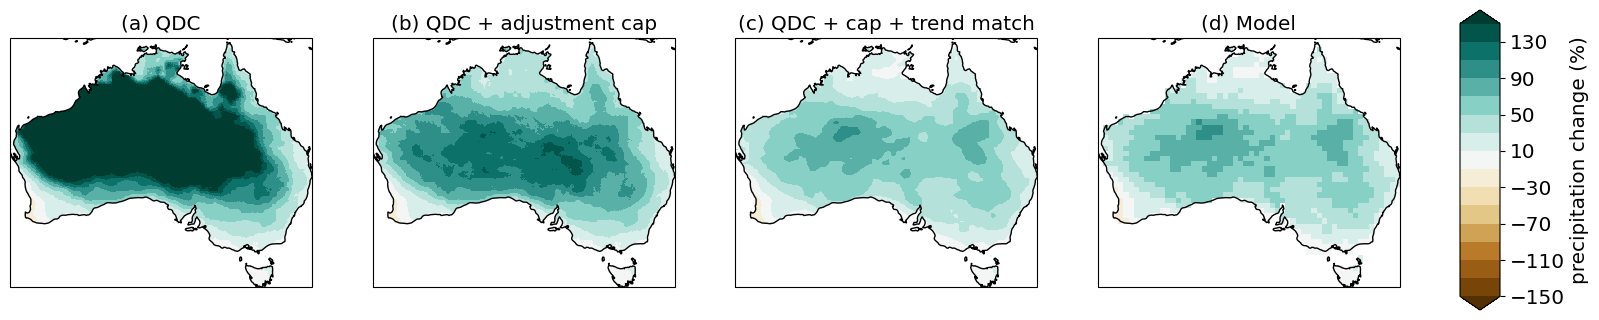

In [21]:
xmin = 112.92
xmax = 153.63
ymin = -43.625
ymax = -10.07    

fig = plt.figure(figsize=[20, 5])
ax1 = fig.add_subplot(141, projection=ccrs.PlateCarree(central_longitude=180))
ax2 = fig.add_subplot(142, projection=ccrs.PlateCarree(central_longitude=180))
ax3 = fig.add_subplot(143, projection=ccrs.PlateCarree(central_longitude=180))
ax4 = fig.add_subplot(144, projection=ccrs.PlateCarree(central_longitude=180))

cmap = 'BrBG'
levels = [-150, -130, -110, -90, -70, -50, -30, -10, 10, 30, 50, 70, 90, 110, 130, 150]

qq_change.plot(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    levels=levels,
    extend='both',
    add_colorbar=False,
)
ax1.coastlines()
#ax1.add_feature(cartopy.feature.STATES)
ax1.set_title('(a) QDC', size='x-large')
ax1.set_extent([xmin, xmax, ymin, ymax], crs=ccrs.PlateCarree())

qq_cap_change.plot(
    ax=ax2,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    levels=levels,
    extend='both',
    add_colorbar=False,
)
ax2.coastlines()
#ax1.add_feature(cartopy.feature.STATES)
ax2.set_title('(b) QDC + adjustment cap', size='x-large')
ax2.set_extent([xmin, xmax, ymin, ymax], crs=ccrs.PlateCarree())

qq_cap_cmatch_change.plot(
    ax=ax3,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    levels=levels,
    extend='both',
    add_colorbar=False,
)
ax3.coastlines()
#ax1.add_feature(cartopy.feature.STATES)
ax3.set_title('(c) QDC + cap + trend match', size='x-large')
ax3.set_extent([xmin, xmax, ymin, ymax], crs=ccrs.PlateCarree())

im = model_change.plot(
    ax=ax4,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    levels=levels,
    extend='both',
#    cbar_kwargs={'label': 'change in annual mean precipitation (%)'},
    add_colorbar=False,
)
ax4.coastlines()
#ax1.add_feature(cartopy.feature.STATES)
ax4.set_title('(d) Model', size='x-large')
ax4.set_extent([xmin, xmax, ymin, ymax], crs=ccrs.PlateCarree())

fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.2, 0.02, 0.6])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize='x-large')
cbar.set_label('precipitation change (%)', size='x-large')

plt.savefig(
    'pr_annual_EC-Earth3_ssp370_r1i1p1f1_native_2070-2090_qdc-multiplicative-q100-linear-variations_BARRA-R2-baseline-1985-2014_model-baseline-1985-2014.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=300
)
plt.show()